### Insurance Fraud Detection

Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")


import os
import re
import json
from datetime import datetime
from datetime import date

#dataframe manipulation
import numpy as np
import pandas as pd

#visualisations
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats
import seaborn as sns
import matplotlib.dates as mdates
plt.style.use('bmh')
from sklearn.metrics import mean_squared_error

#time series data
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

#### Import file

In [2]:
df = pd.read_excel("Dataset.xlsx")
df.head(4)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,gdp_per_quarter
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,NaN
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,NaN
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,NaN
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,NaN


#### Exploratory Descriptive Analysis

In [3]:
df.shape

(15420, 31)

There are 33 columns in total with 15420 cases in the dataset

#### Descriptive Analysis - Continuous Variables - Univariate

There are 4 continuous variables in the dataset. These are as follows:
* WeekofMonth
* WeekofMonthClaimed
* Age
* Deductible

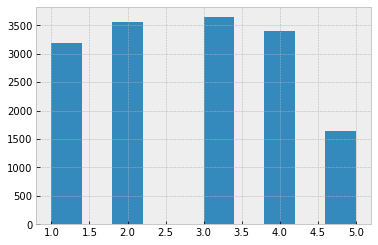

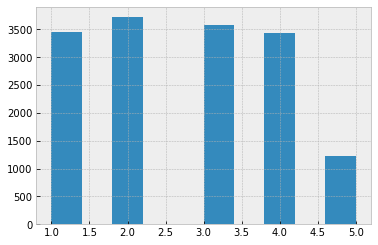

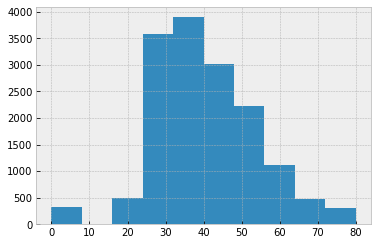

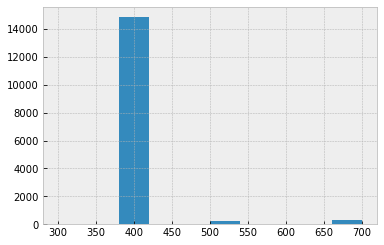

In [4]:
cont_variables = (df['WeekOfMonth'], df['WeekOfMonthClaimed'], df['Age'], df['Deductible'])

for column in cont_variables:
    x = column
    plt.hist(x, bins=10)
    plt.show()


##### Read in GDP data

In [5]:
df.dtypes

Month                    object
WeekOfMonth               int64
DayOfWeek                object
Make                     object
AccidentArea             object
DayOfWeekClaimed         object
MonthClaimed             object
WeekOfMonthClaimed        int64
Sex                      object
MaritalStatus            object
Age                       int64
Fault                    object
PolicyType               object
VehicleCategory          object
VehiclePrice             object
FraudFound_P              int64
Deductible                int64
Days_Policy_Accident     object
Days_Policy_Claim        object
PastNumberOfClaims       object
AgeOfVehicle             object
AgeOfPolicyHolder        object
PoliceReportFiled        object
WitnessPresent           object
AgentType                object
NumberOfSuppliments      object
AddressChange_Claim      object
NumberOfCars             object
Year                      int64
BasePolicy               object
gdp_per_quarter         float64
dtype: o

In [6]:
#transform target variable to string
df['FraudFound_P'] = df['FraudFound_P'].astype(str)

In [7]:
df['FraudFound_P'] = df['FraudFound_P'].str.replace('1', 'Yes')
df['FraudFound_P'] = df['FraudFound_P'].str.replace('0', 'No')

In [8]:
df.head(3)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,gdp_per_quarter
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,NaN
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,NaN
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,NaN


#### Create dummy variables

In [9]:

cat_vars=['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed',
            'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice',
            'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims','AgeOfVehicle',
            'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
            'AddressChange_Claim', 'NumberOfCars', 'Year', 'FraudFound_P']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1

cat_vars=['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed',
            'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice',
            'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims','AgeOfVehicle',
            'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
            'AddressChange_Claim', 'NumberOfCars', 'Year', 'FraudFound_P']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [10]:
df_final=df[to_keep]
df_final.columns.values

array(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'Deductible',
       'BasePolicy', 'gdp_per_quarter', 'Month_Apr', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'DayOfWeek_Friday', 'DayOfWeek_Monday', 'DayOfWeek_Saturday',
       'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday',
       'DayOfWeek_Wednesday', 'Make_Accura', 'Make_BMW', 'Make_Chevrolet',
       'Make_Dodge', 'Make_Ferrari', 'Make_Ford', 'Make_Honda',
       'Make_Jaguar', 'Make_Lexus', 'Make_Mazda', 'Make_Mecedes',
       'Make_Mercury', 'Make_Nisson', 'Make_Pontiac', 'Make_Porche',
       'Make_Saab', 'Make_Saturn', 'Make_Toyota', 'Make_VW',
       'AccidentArea_Rural', 'AccidentArea_Urban', 'DayOfWeekClaimed_0',
       'DayOfWeekClaimed_Friday', 'DayOfWeekClaimed_Monday',
       'DayOfWeekClaimed_Saturday', 'DayOfWeekClaimed_Sunday',
       'DayOfWeekClaimed_Thursday', 'DayOfWeekClaimed_

In [11]:
df_final.shape

(15420, 148)

#### Multicollinearity check

<AxesSubplot:>

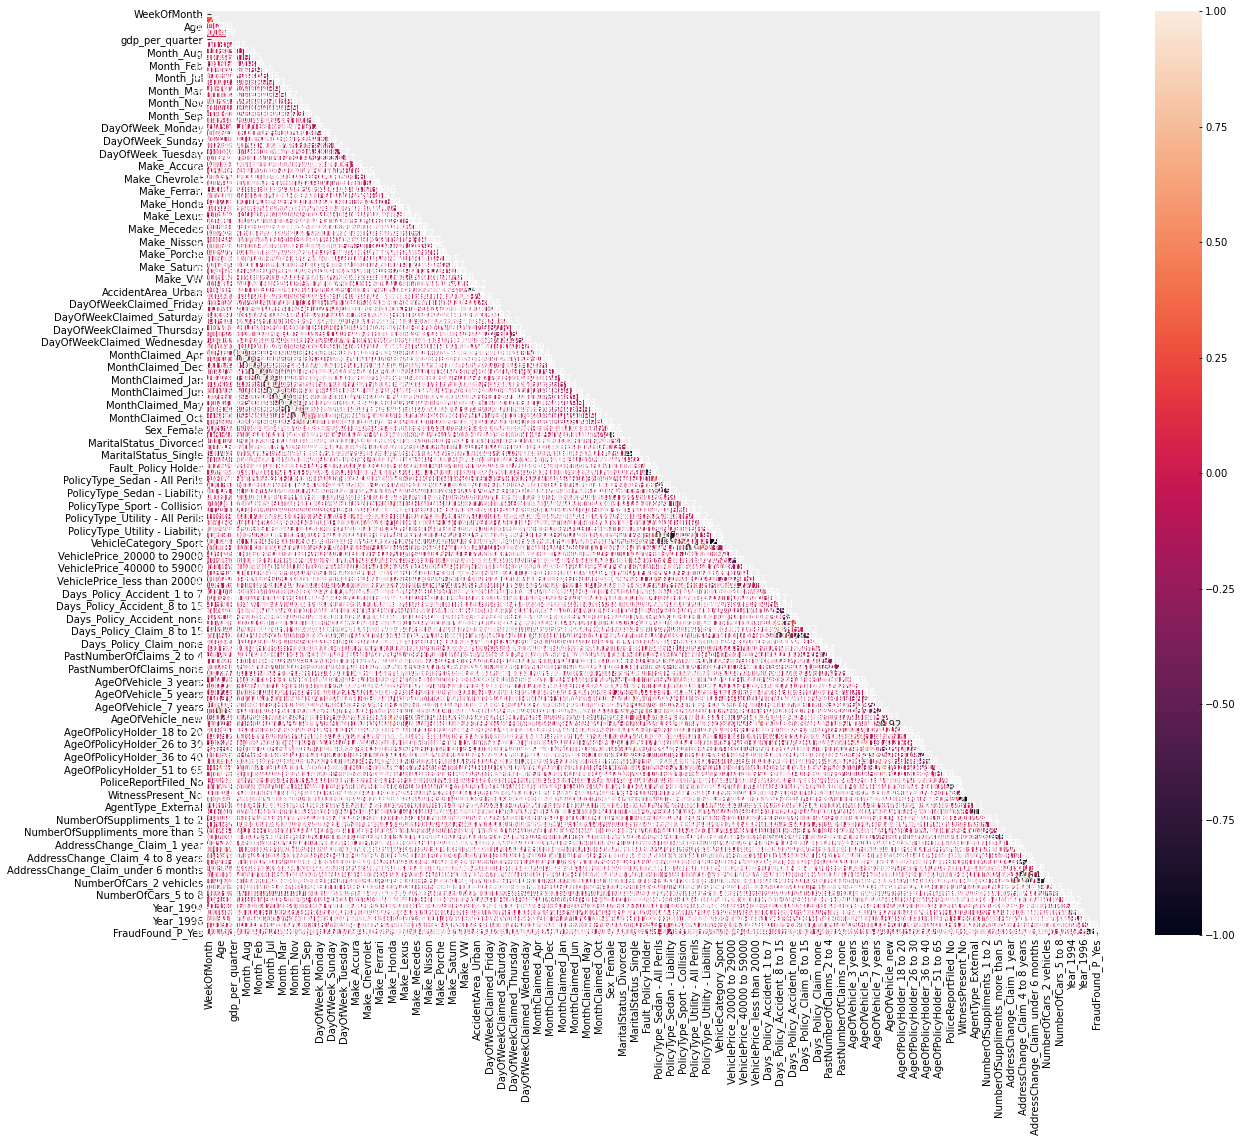

In [12]:
# set figure size
plt.figure(figsize=(20,17))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df_final.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df_final.corr(method='pearson'), annot=True, mask=mask, vmin=-1, vmax=1)


In [13]:
#VIF
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df_final[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif


In [16]:
# features to consider removing
considered_features = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'Deductible', 'BasePolicy', 'gdp_per_quarter', 'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'DayOfWeek_Friday', 'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'Make_Accura', 'Make_BMW', 'Make_Chevrolet', 'Make_Dodge', 'Make_Ferrari', 'Make_Ford', 'Make_Honda', 'Make_Jaguar', 'Make_Lexus', 'Make_Mazda', 'Make_Mecedes', 'Make_Mercury', 'Make_Nisson', 'Make_Pontiac', 'Make_Porche', 'Make_Saab', 'Make_Saturn', 'Make_Toyota', 'Make_VW', 'AccidentArea_Rural', 'AccidentArea_Urban', 'DayOfWeekClaimed_0', 'DayOfWeekClaimed_Friday', 'DayOfWeekClaimed_Monday', 'DayOfWeekClaimed_Saturday', 'DayOfWeekClaimed_Sunday', 'DayOfWeekClaimed_Thursday', 'DayOfWeekClaimed_Tuesday', 'DayOfWeekClaimed_Wednesday', 'MonthClaimed_0', 'MonthClaimed_Apr', 'MonthClaimed_Aug', 'MonthClaimed_Dec', 'MonthClaimed_Feb', 'MonthClaimed_Jan', 'MonthClaimed_Jul', 'MonthClaimed_Jun', 'MonthClaimed_Mar', 'MonthClaimed_May', 'MonthClaimed_Nov', 'MonthClaimed_Oct', 'MonthClaimed_Sep', 'Sex_Female', 'Sex_Male', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Widow', 'Fault_Policy Holder', 'Fault_Third Party', 'PolicyType_Sedan - All Perils', 'PolicyType_Sedan - Collision', 'PolicyType_Sedan - Liability', 'PolicyType_Sport - All Perils', 'PolicyType_Sport - Collision', 'PolicyType_Sport - Liability', 'PolicyType_Utility - All Perils', 'PolicyType_Utility - Collision', 'PolicyType_Utility - Liability', 'VehicleCategory_Sedan', 'VehicleCategory_Sport', 'VehicleCategory_Utility', 'VehiclePrice_20000 to 29000', 'VehiclePrice_30000 to 39000', 'VehiclePrice_40000 to 59000', 'VehiclePrice_60000 to 69000', 'VehiclePrice_less than 20000', 'VehiclePrice_more than 69000', 'Days_Policy_Accident_1 to 7', 'Days_Policy_Accident_15 to 30', 'Days_Policy_Accident_8 to 15', 'Days_Policy_Accident_more than 30', 'Days_Policy_Accident_none', 'Days_Policy_Claim_15 to 30', 'Days_Policy_Claim_8 to 15', 'Days_Policy_Claim_more than 30', 'Days_Policy_Claim_none', 'PastNumberOfClaims_1', 'PastNumberOfClaims_2 to 4', 'PastNumberOfClaims_more than 4', 'PastNumberOfClaims_none', 'AgeOfVehicle_2 years', 'AgeOfVehicle_3 years', 'AgeOfVehicle_4 years', 'AgeOfVehicle_5 years', 'AgeOfVehicle_6 years', 'AgeOfVehicle_7 years', 'AgeOfVehicle_more than 7', 'AgeOfVehicle_new', 'AgeOfPolicyHolder_16 to 17', 'AgeOfPolicyHolder_18 to 20', 'AgeOfPolicyHolder_21 to 25', 'AgeOfPolicyHolder_26 to 30', 'AgeOfPolicyHolder_31 to 35', 'AgeOfPolicyHolder_36 to 40', 'AgeOfPolicyHolder_41 to 50', 'AgeOfPolicyHolder_51 to 65', 'AgeOfPolicyHolder_over 65', 'PoliceReportFiled_No', 'PoliceReportFiled_Yes', 'WitnessPresent_No', 'WitnessPresent_Yes', 'AgentType_External', 'AgentType_Internal', 'NumberOfSuppliments_1 to 2', 'NumberOfSuppliments_3 to 5', 'NumberOfSuppliments_more than 5', 'NumberOfSuppliments_none', 'AddressChange_Claim_1 year', 'AddressChange_Claim_2 to 3 years', 'AddressChange_Claim_4 to 8 years', 'AddressChange_Claim_no change', 'AddressChange_Claim_under 6 months', 'NumberOfCars_1 vehicle', 'NumberOfCars_2 vehicles', 'NumberOfCars_3 to 4', 'NumberOfCars_5 to 8', 'NumberOfCars_more than 8', 'Year_1994', 'Year_1995', 'Year_1996', 'FraudFound_P_No', 'FraudFound_P_Yes']

# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [14]:
df_final.head(3)

,WeekOfMonth,WeekOfMonthClaimed,Age,Deductible,BasePolicy,gdp_per_quarter,Month_Apr,Month_Aug,Month_Dec,Month_Feb,...,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,Year_1994,Year_1995,Year_1996,FraudFound_P_No,FraudFound_P_Yes
0,5,1,21,300,Liability,NaN,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,3,4,34,400,Collision,NaN,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,5,2,47,400,Collision,NaN,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [26]:
matrix = df_final.corr()

In [27]:
matrix.to_excel("Corr.xlsx")

In [28]:
df_final.head(3)

,WeekOfMonth,WeekOfMonthClaimed,Age,Deductible,BasePolicy,gdp_per_quarter,Month_Apr,Month_Aug,Month_Dec,Month_Feb,...,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,Year_1994,Year_1995,Year_1996,FraudFound_P_No,FraudFound_P_Yes
0,5,1,21,300,Liability,NaN,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,3,4,34,400,Collision,NaN,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,5,2,47,400,Collision,NaN,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


#### Logistic Regression 

In [9]:
#build logistic regression model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#create dummy variables

#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


